In [9]:
import pandas as pd

In [10]:
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\PYTHONDATSET\SALESDATASET.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [11]:
print("Dataset Shape:(Rows,Columns)", df.shape)

Dataset Shape:(Rows,Columns) (1000, 9)


In [12]:
print("\nColumn Information:")
print(df.info())


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [13]:
print(df.isnull().sum())


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [31]:
high_sales = df[df["Total Amount"] > 1400]
print(high_sales)


     Transaction ID       Date Customer ID  Gender  Age Product Category  \
12               13 2023-08-05     CUST013    Male   22      Electronics   
14               15 2023-01-16     CUST015  Female   42      Electronics   
15               16 2023-02-17     CUST016    Male   19         Clothing   
46               47 2023-11-06     CUST047  Female   40           Beauty   
53               54 2023-02-10     CUST054  Female   38      Electronics   
..              ...        ...         ...     ...  ...              ...   
926             927 2023-06-24     CUST927    Male   43      Electronics   
941             942 2023-03-18     CUST942    Male   51         Clothing   
945             946 2023-05-08     CUST946    Male   62      Electronics   
955             956 2023-08-19     CUST956    Male   30         Clothing   
969             970 2023-05-16     CUST970    Male   59      Electronics   

     Quantity  Price per Unit  Total Amount  Month  
12          3             500     

In [15]:
sorted_df = df.sort_values(by="Total Amount" ,ascending = False)
print(sorted_df)


     Transaction ID        Date Customer ID  Gender  Age Product Category  \
64               65  05-12-2023     CUST065    Male   51      Electronics   
280             281  23-05-2023     CUST281  Female   29           Beauty   
268             269  01-02-2023     CUST269    Male   25         Clothing   
663             664  28-12-2023     CUST664  Female   44         Clothing   
633             634  08-10-2023     CUST634    Male   60      Electronics   
..              ...         ...         ...     ...  ...              ...   
426             427  15-08-2023     CUST427    Male   25      Electronics   
876             877  19-06-2023     CUST877  Female   58         Clothing   
954             955  14-07-2023     CUST955    Male   58         Clothing   
951             952  13-11-2023     CUST952  Female   57         Clothing   
966             967  17-04-2023     CUST967    Male   62           Beauty   

     Quantity  Price per Unit  Total Amount  
64          4             500

In [16]:
sorted_by_age = df.sort_values(by="Age", ascending=True)
print(sorted_by_age.head())


     Transaction ID        Date Customer ID  Gender  Age Product Category  \
36               37  23-05-2023     CUST037  Female   18           Beauty   
73               74  22-11-2023     CUST074  Female   18           Beauty   
537             538  17-09-2023     CUST538    Male   18         Clothing   
555             556  04-06-2023     CUST556  Female   18      Electronics   
594             595  09-11-2023     CUST595  Female   18         Clothing   

     Quantity  Price per Unit  Total Amount  
36          3              25            75  
73          4             500          2000  
537         3              50           150  
555         1              50            50  
594         4             500          2000  


In [17]:
# Total sales per Product Category
category_sales = df.groupby("Product Category")["Total Amount"].sum()
print(category_sales)


Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


In [18]:
# Average Quantity purchased per Product Category
avg_quantity = df.groupby("Product Category")["Quantity"].mean()
print(avg_quantity)


Product Category
Beauty         2.511401
Clothing       2.547009
Electronics    2.482456
Name: Quantity, dtype: float64


In [19]:
sales_by_gender = df.groupby("Gender")["Total Amount"].sum()
print(sales_by_gender)


Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [21]:
 # Finding the Best-Selling Products
top_products = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)
print(top_products)


Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [22]:
# identify peak sales months for business strategy.
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)  
df["Month"] = df["Date"].dt.month  # Extract month 
monthly_sales = df.groupby("Month")["Total Amount"].sum().sort_values(ascending=False)
print(monthly_sales)



Month
5     53150
10    46580
12    44690
2     44060
1     36980
8     36960
6     36715
7     35465
11    34920
4     33870
3     28990
9     23620
Name: Total Amount, dtype: int64


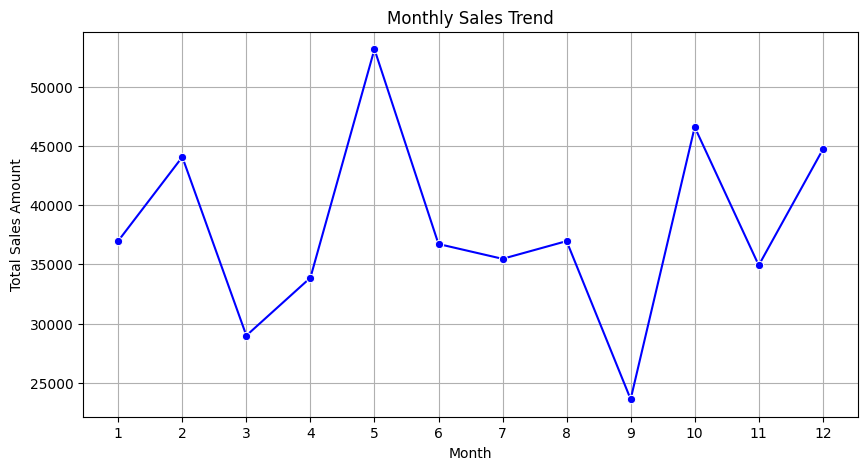

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", linestyle="-", color="b")

plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.title("Monthly Sales Trend")
plt.xticks(range(1, 13))  # Ensuring all months are displayed
plt.grid(True)

plt.show()


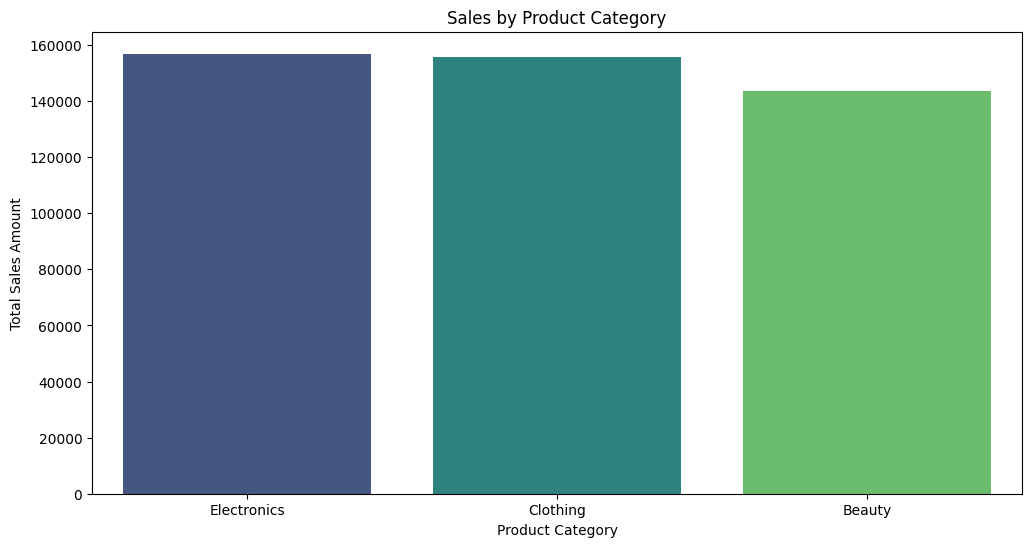

In [24]:
# Aggregate total sales by Product Category
category_sales = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)

# Plot bar chart (Fixing the FutureWarning)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index, dodge=False, palette="viridis")

plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.title("Sales by Product Category")
plt.legend([],[], frameon=False)  # Hide legend since we only need colors

plt.show()


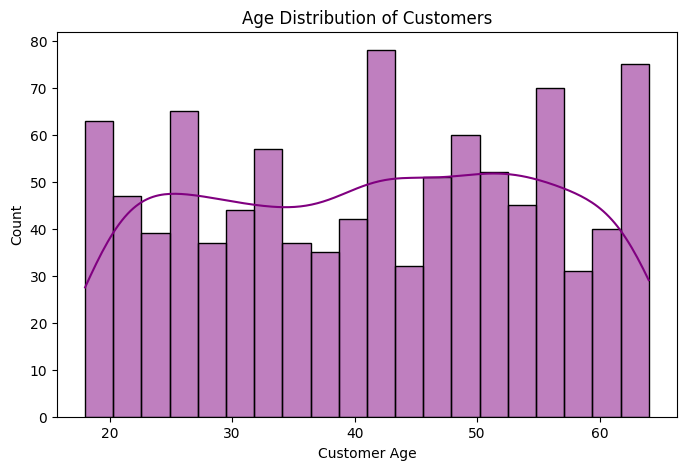

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="purple")

plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.title("Age Distribution of Customers")

plt.show()


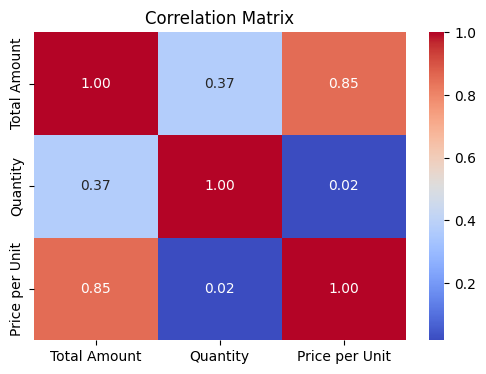

In [28]:

# Compute correlation matrix
correlation_matrix = df[["Total Amount", "Quantity", "Price per Unit"]].corr()

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [27]:
!pip install scipy

In [75]:
 pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------- ----------------- 1.0/1.8 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0
    Uninstalling pip-25.0:
      Successfully uninstalled pip-25.0
Note: you may need to restart the kernel to use updated packages.


In [76]:
from scipy.stats import ttest_ind

# Split data into two groups: Male & Female
male_sales = df[df["Gender"] == "Male"]["Total Amount"]
female_sales = df[df["Gender"] == "Female"]["Total Amount"]

# Perform independent t-test
t_stat, p_value = ttest_ind(male_sales, female_sales, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in sales between Male and Female customers.")
else:
    print("No significant difference in sales between Male and Female customers.")


T-statistic: -0.03
P-value: 0.9748
No significant difference in sales between Male and Female customers.


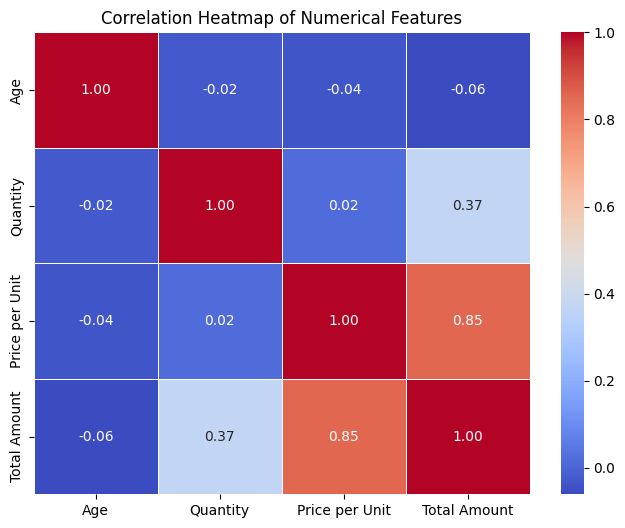

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numeric_cols = ["Age", "Quantity", "Price per Unit", "Total Amount"]

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [79]:
from scipy.stats import ttest_ind

# Define Discounted and Non-Discounted categories
median_price = df["Price per Unit"].median()
df["Discounted"] = df["Price per Unit"] < median_price

# Split the data into two groups
discounted_sales = df[df["Discounted"]]["Total Amount"]
non_discounted_sales = df[~df["Discounted"]]["Total Amount"]

# Perform t-test
t_stat, p_value = ttest_ind(discounted_sales, non_discounted_sales)

# Display results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("🔍 Significant difference: Discounts impact sales!")
else:
    print("❌ No significant impact of discounts on sales.")


T-statistic: -21.30
P-value: 0.0000
🔍 Significant difference: Discounts impact sales!


In [81]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 5.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.1 MB 5.1 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 4.5 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 4.3 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 4.2 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.1 MB 4.1 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 3.9 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 3.7 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.4 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.1 MB 3.3 MB/s eta 0:00:01
   ---

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select Features and Target Variable
X = df[["Age", "Quantity", "Price per Unit"]]  # Features
y = df["Total Amount"]  # Target

# Split Data into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display Results
print(f"📉 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📊 R² Score: {r2:.4f}")

# Interpretation
if r2 > 0.7:
    print("✅ Good Model: The model explains a significant portion of variance in sales data.")
else:
    print("⚠️ Model needs improvement: Consider adding more features.")


📉 Mean Absolute Error (MAE): 173.12
📊 R² Score: 0.8569
✅ Good Model: The model explains a significant portion of variance in sales data.


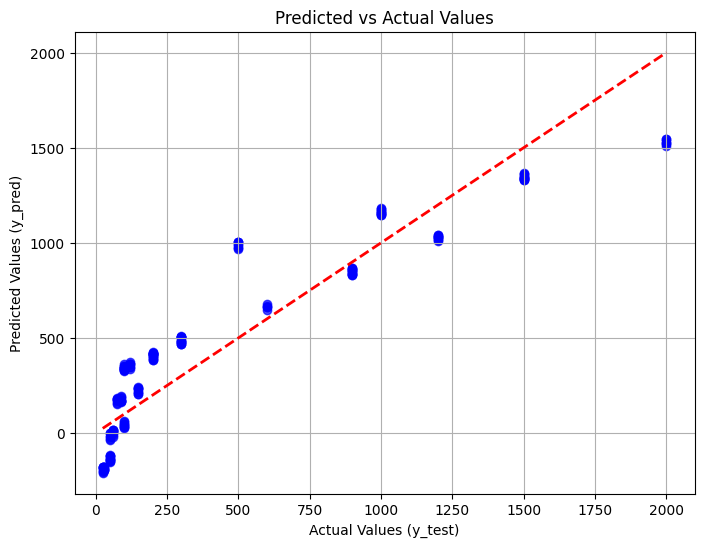

In [35]:
import matplotlib.pyplot as plt

# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.grid(True)
plt.show()
